<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Minimum_White_Tiles_After_Covering_With_Carpets_(Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Minimum White Tiles After Covering With Carpets

You are given a 0-indexed binary string floor, which represents the colors of tiles on a floor:

- floor[i] = '0' denotes that the ith tile of the floor is colored black.
- On the other hand, floor[i] = '1' denotes that the ith tile of the floor is colored white.

You are also given numCarpets and carpetLen. You have numCarpets black carpets, each of length carpetLen tiles. Cover the tiles with the given carpets such that the number of white tiles still visible is minimum. Carpets may overlap one another.

Return the minimum number of white tiles still visible.

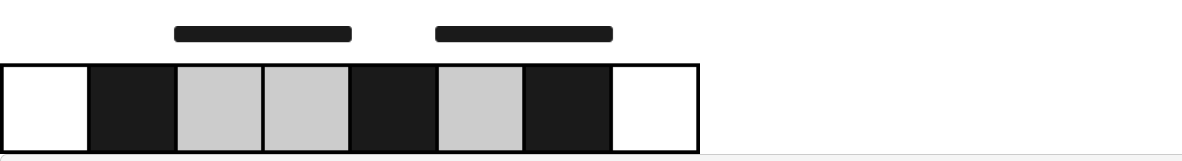

Example 1:

```
Input: floor = "10110101", numCarpets = 2, carpetLen = 2
Output: 2
Explanation: 
The figure above shows one way of covering the tiles with the carpets such that only 2 white tiles are visible.
No other way of covering the tiles with the carpets can leave less than 2 white tiles visible.
```



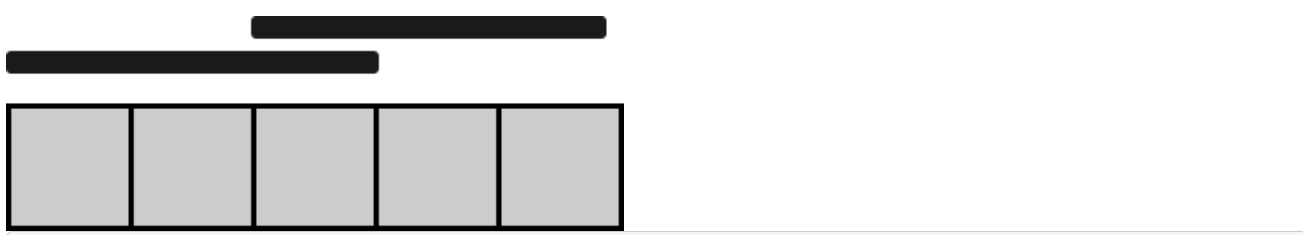

Example 2:

```
Input: floor = "11111", numCarpets = 2, carpetLen = 3
Output: 0
Explanation: 
The figure above shows one way of covering the tiles with the carpets such that no white tiles are visible.
Note that the carpets are able to overlap one another.
```



Constraints:

```
1 <= carpetLen <= floor.length <= 1000
floor[i] is either '0' or '1'.
1 <= numCarpets <= 1000
```



# Solution

- Dynamic Array

In [1]:
# Time O(N * C)
# Sapce O(N)

# N = len(floor)
# C = numCarpets

class Solution:
    def minimumWhiteTiles(self, floor, numCarpets, carpetLen):
        visible_white_current = [0] * len(floor)
        visible_white_previous = []
        white_count = 0
        for tile in floor:
            if tile == "1":
                white_count += 1
            visible_white_previous.append(white_count)
        
        for numCarpet in range(numCarpets):
            for idx, tile in enumerate(floor):
                if (idx + 1) - carpetLen <= 0:
                    visible_white_current[idx] = 0
                else:
                    visible_white_current[idx] = min(visible_white_previous[idx - (carpetLen)],
                                                     visible_white_current[idx - 1] + int(tile == '1'))
                    
            visible_white_previous = visible_white_current
            visible_white_current = [0] * len(floor)
        
        return visible_white_previous[-1]

In [2]:
floor = "10110101"
numCarpets = 2
carpetLen = 2
expected = 2

output = Solution().minimumWhiteTiles(floor, numCarpets, carpetLen)
print(output)
assert output == expected

2


In [3]:
floor = "1"
numCarpets = 1
carpetLen = 1
expected = 0

output = Solution().minimumWhiteTiles(floor, numCarpets, carpetLen)
print(output)
assert output == expected

0


# Conceptual Note

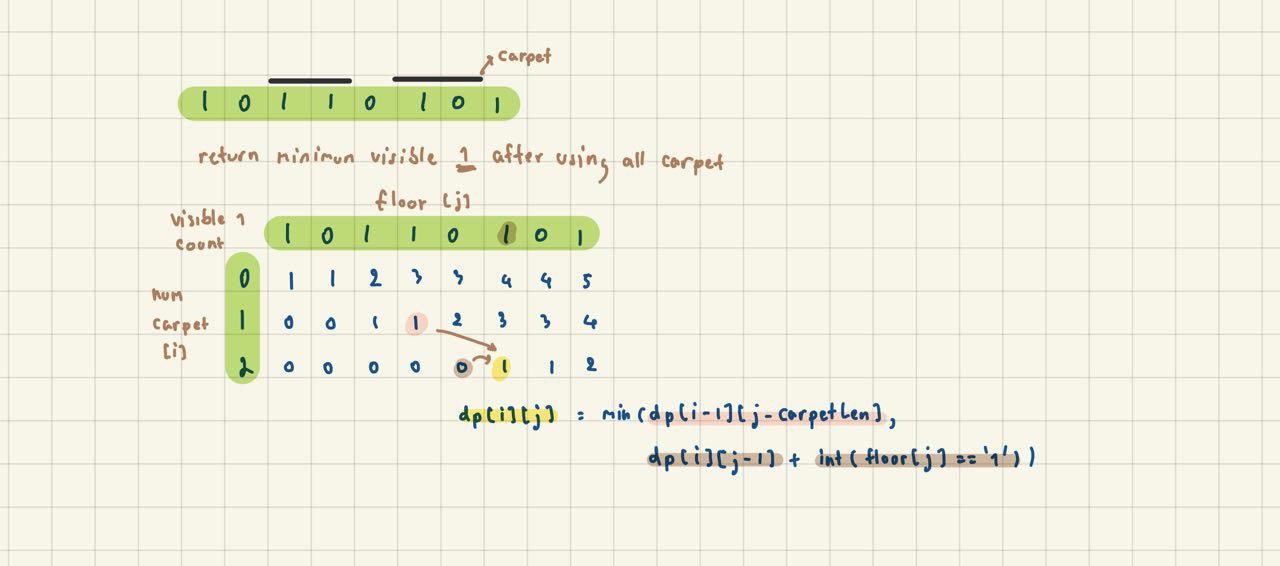